## Investigations of Supervised Machine Learning Algorithm: Classification

This project explores various supervised machine learning algorithms and evaluate their performance scores. This proejct focuses on classification, analyzing pros and cons and determing when to use each of them.


This project works with the Breast Cancer Wisconsin dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

For more information, see https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

## Table of Contents

**Part 0: Understanding and Reshaping Datasets**
- Explore distributions of data, types of features, possible imbalances in classes
- Display the correlation between each data using function `seaborn` `violinplot` and `pairplot`
- Modify Datasets using `stratify` 

**Part 1: K-Nearest Neighbors**
- Fit the data using `sklearn` `KNeighborsClassifier`
- Explore various k values and identify the best-resulting k constant
- Display dependence on amounts of data using seaborn, altering amounts of data and drawing different split of training/testing data
- To prevent overfitting, use `SequentialFeatureSelector` to see which feature variables are important.

**Part 2: Linear Regression Model**
- Because linear regression is heavily based on weights and distributions of datasets, modify the data using `normalize`
- Explore various linear regression models -- `LinearRegression`, `LogisticRegression`, `RidgeCV`, `Perceptron`, and `SVM`
- Determine whether the given datasets are seperable by a linear model

**Part 3: Nonlinear Regression Model**
- `SVM`can be utilized for a non-linear regression by changing into different kernals 
- Develop tree-based models using `DecisionTreeClassifier` and `RandomForestClassifier`
- Train an artifical neural network using `MLPClassifier`

**Part 4: Neural Network**
- Define and train a simple Neural-Network with `PyTorch` and use it via `skorch` with `SciKit-Learn`. Bulid ANN.

### PART 0: Understanding the data


In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [221]:
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [222]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

**a. Total Sample Number, Feature Count/data type, Imblances/NA sample (If applicable)**

In [223]:
print('Sample number:', df.shape[0])
print('Feature count:', df.shape[1], "\n")

print("Number of NaN values:", df.isna().sum().sum(), "\n")
print("Checking possible imbalances in classes:")
print(cancer['target_names'][0], np.count_nonzero(cancer['target'] == 0))
print(cancer['target_names'][1], np.count_nonzero(cancer['target'] == 1), "\n")

Sample number: 569
Feature count: 30 

Number of NaN values: 0 

Checking possible imbalances in classes:
malignant 212
benign 357 



In [224]:
print("Feature data types:")
print(df.dtypes)
print()

Feature data types:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64


**b. Distribution of the first four features using `violinplot`**

Note that features are distributed in a wide range; minimum range:0.00-0.02 maximum range: 0-2500

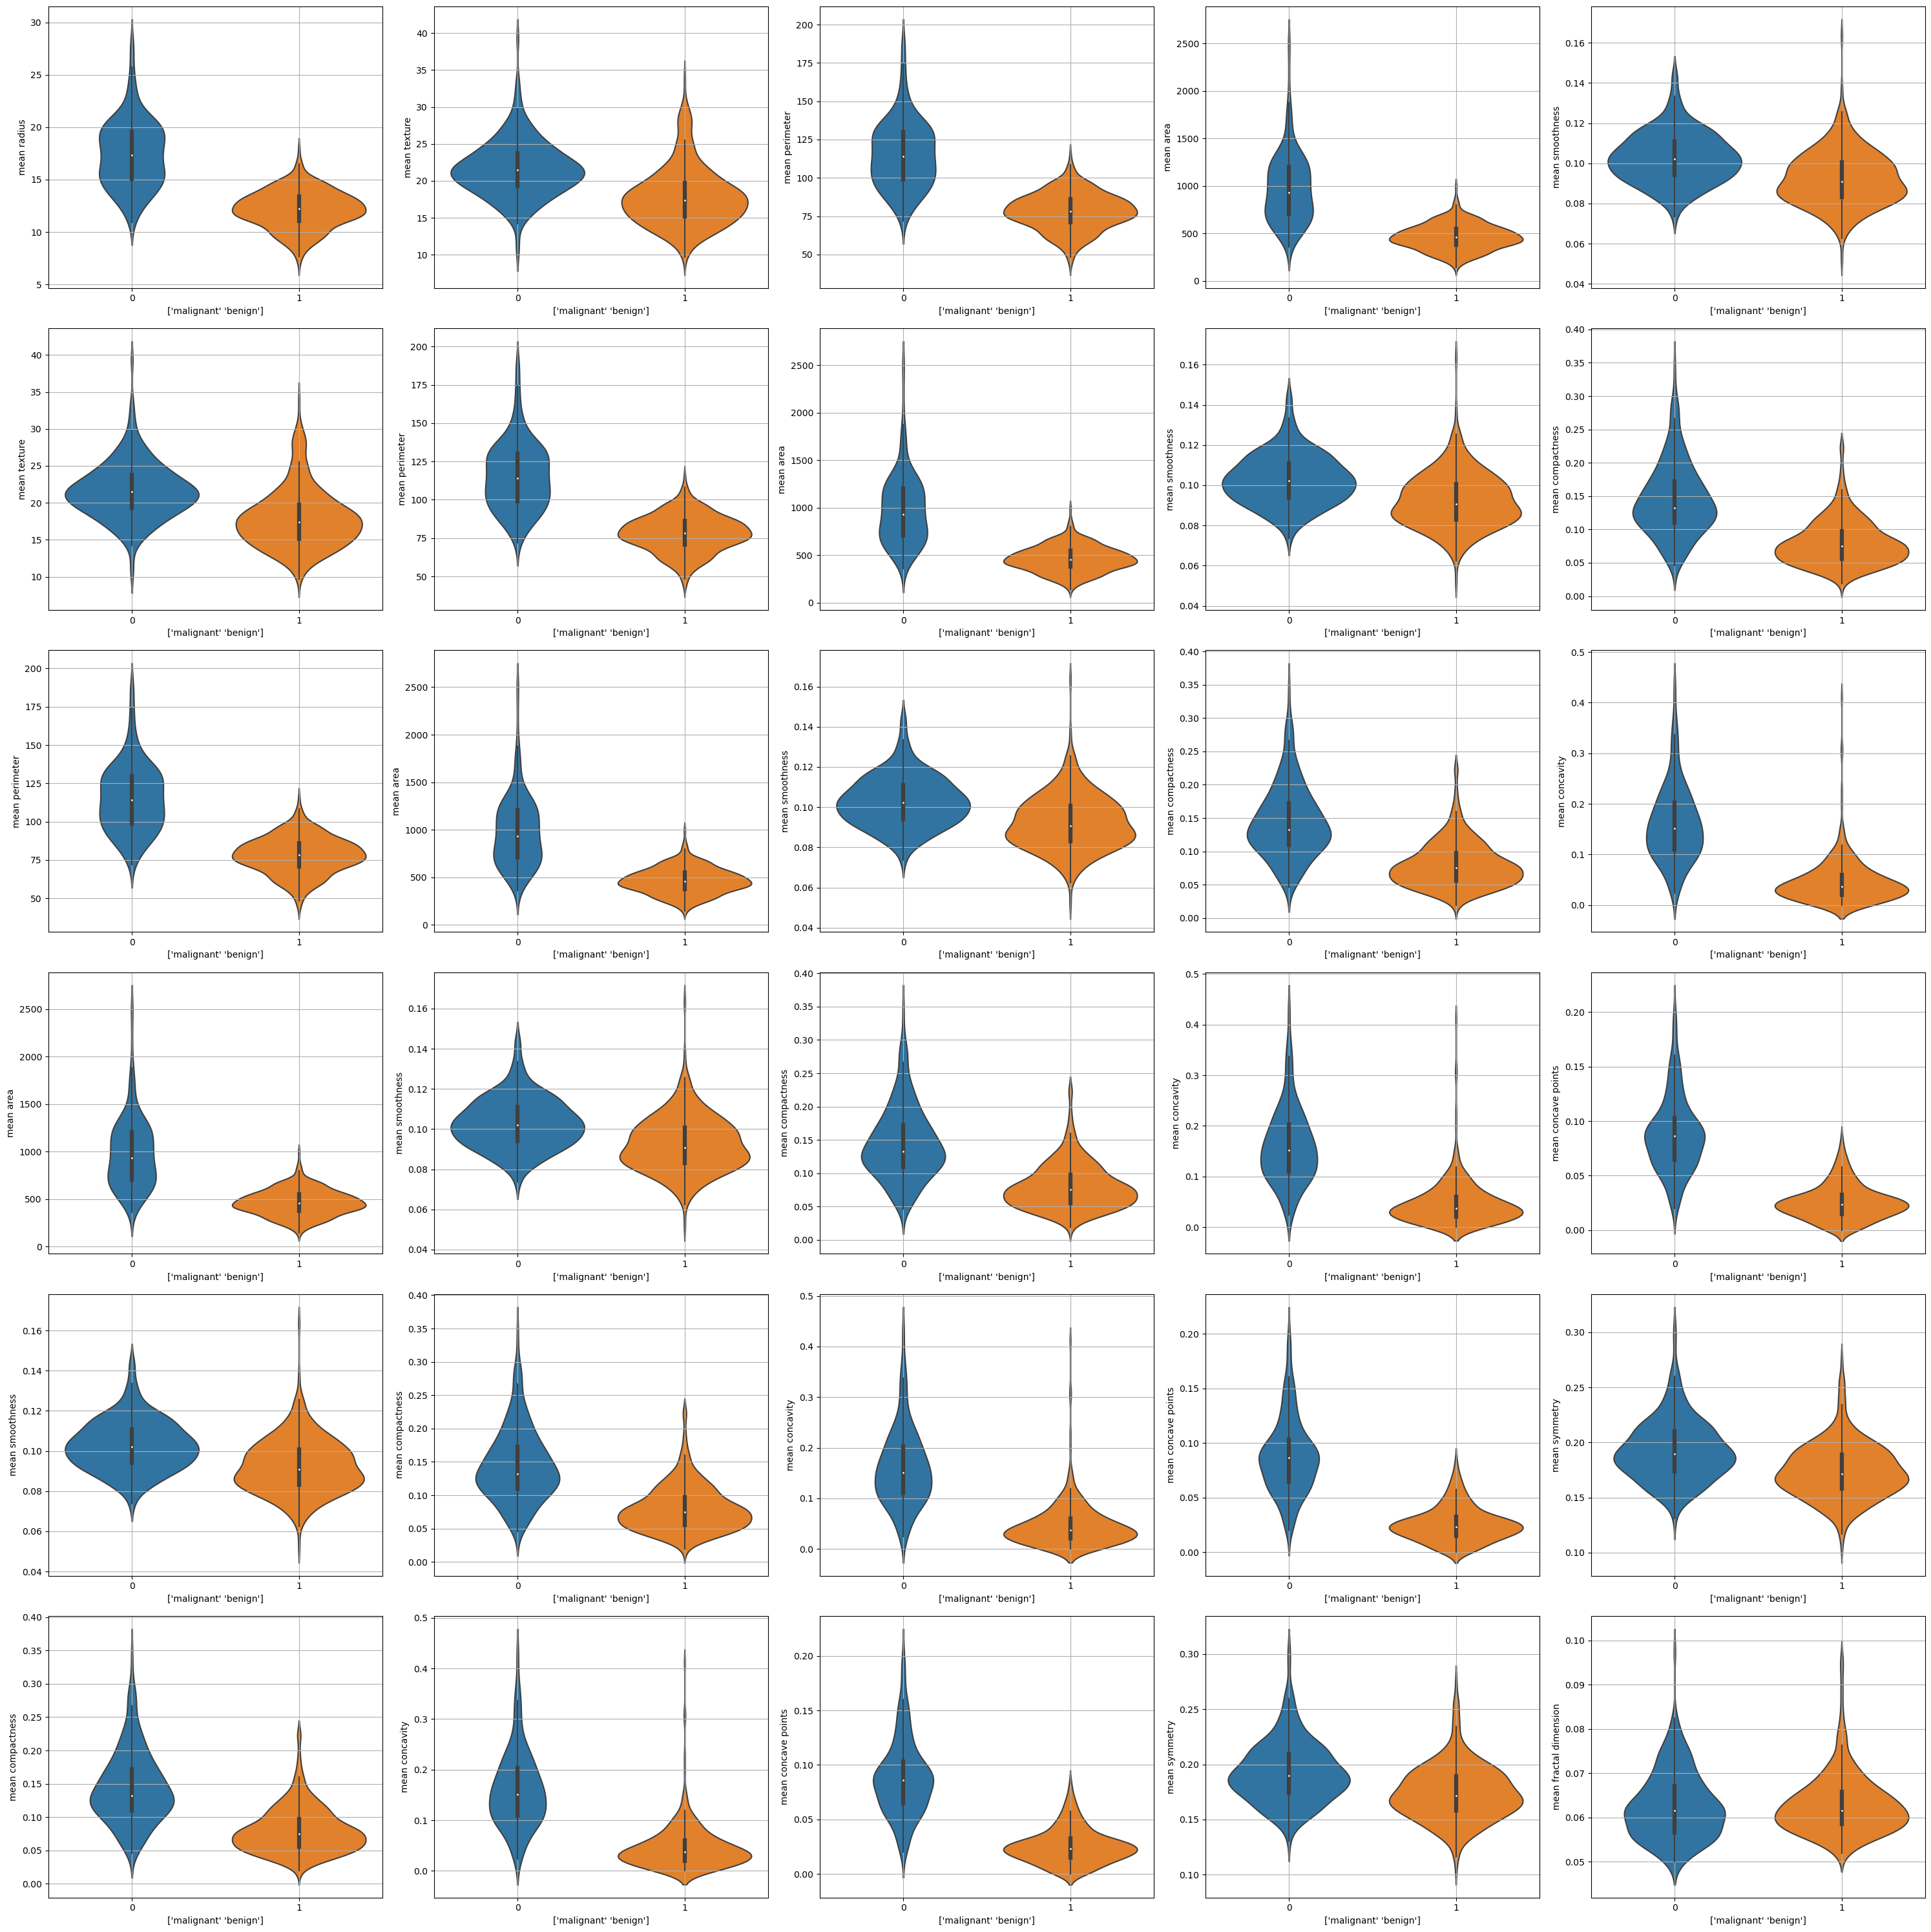

In [225]:
fig, axes = plt.subplots(6,5, figsize=(30,30))

for i in range(6):
    for j in range(5):
        sns.violinplot(ax=axes[i][j], x=cancer['target'], y=df.iloc[:,i+j])
        axes[i][j].set_xlabel(str(cancer['target_names']))
        axes[i][j].grid()
plt.tight_layout()

**c. Distribution of features can be explored using `pairplot`.** 

*I explored the first 10 features related to 'mean' for simplicity.*
The diagonal plots are univariate distribution plots, displaying the marginal distribution of the data in each column. Some features are shown to be highly linearly correlated, while others don't. In particular, mean texture and mean radius are linearly correlated, as well as mean area and mean perimeter are correlated in a linear/polynomial fashion. On the other hand, mean fractor and mean concave points do not show a clear relatinoship. One can conclude that there is no correlation between them, but consider that distribution of perimeter ranges from 50-200 while that of concave points ranges from 0-.2, adjusting values could solve the problem.

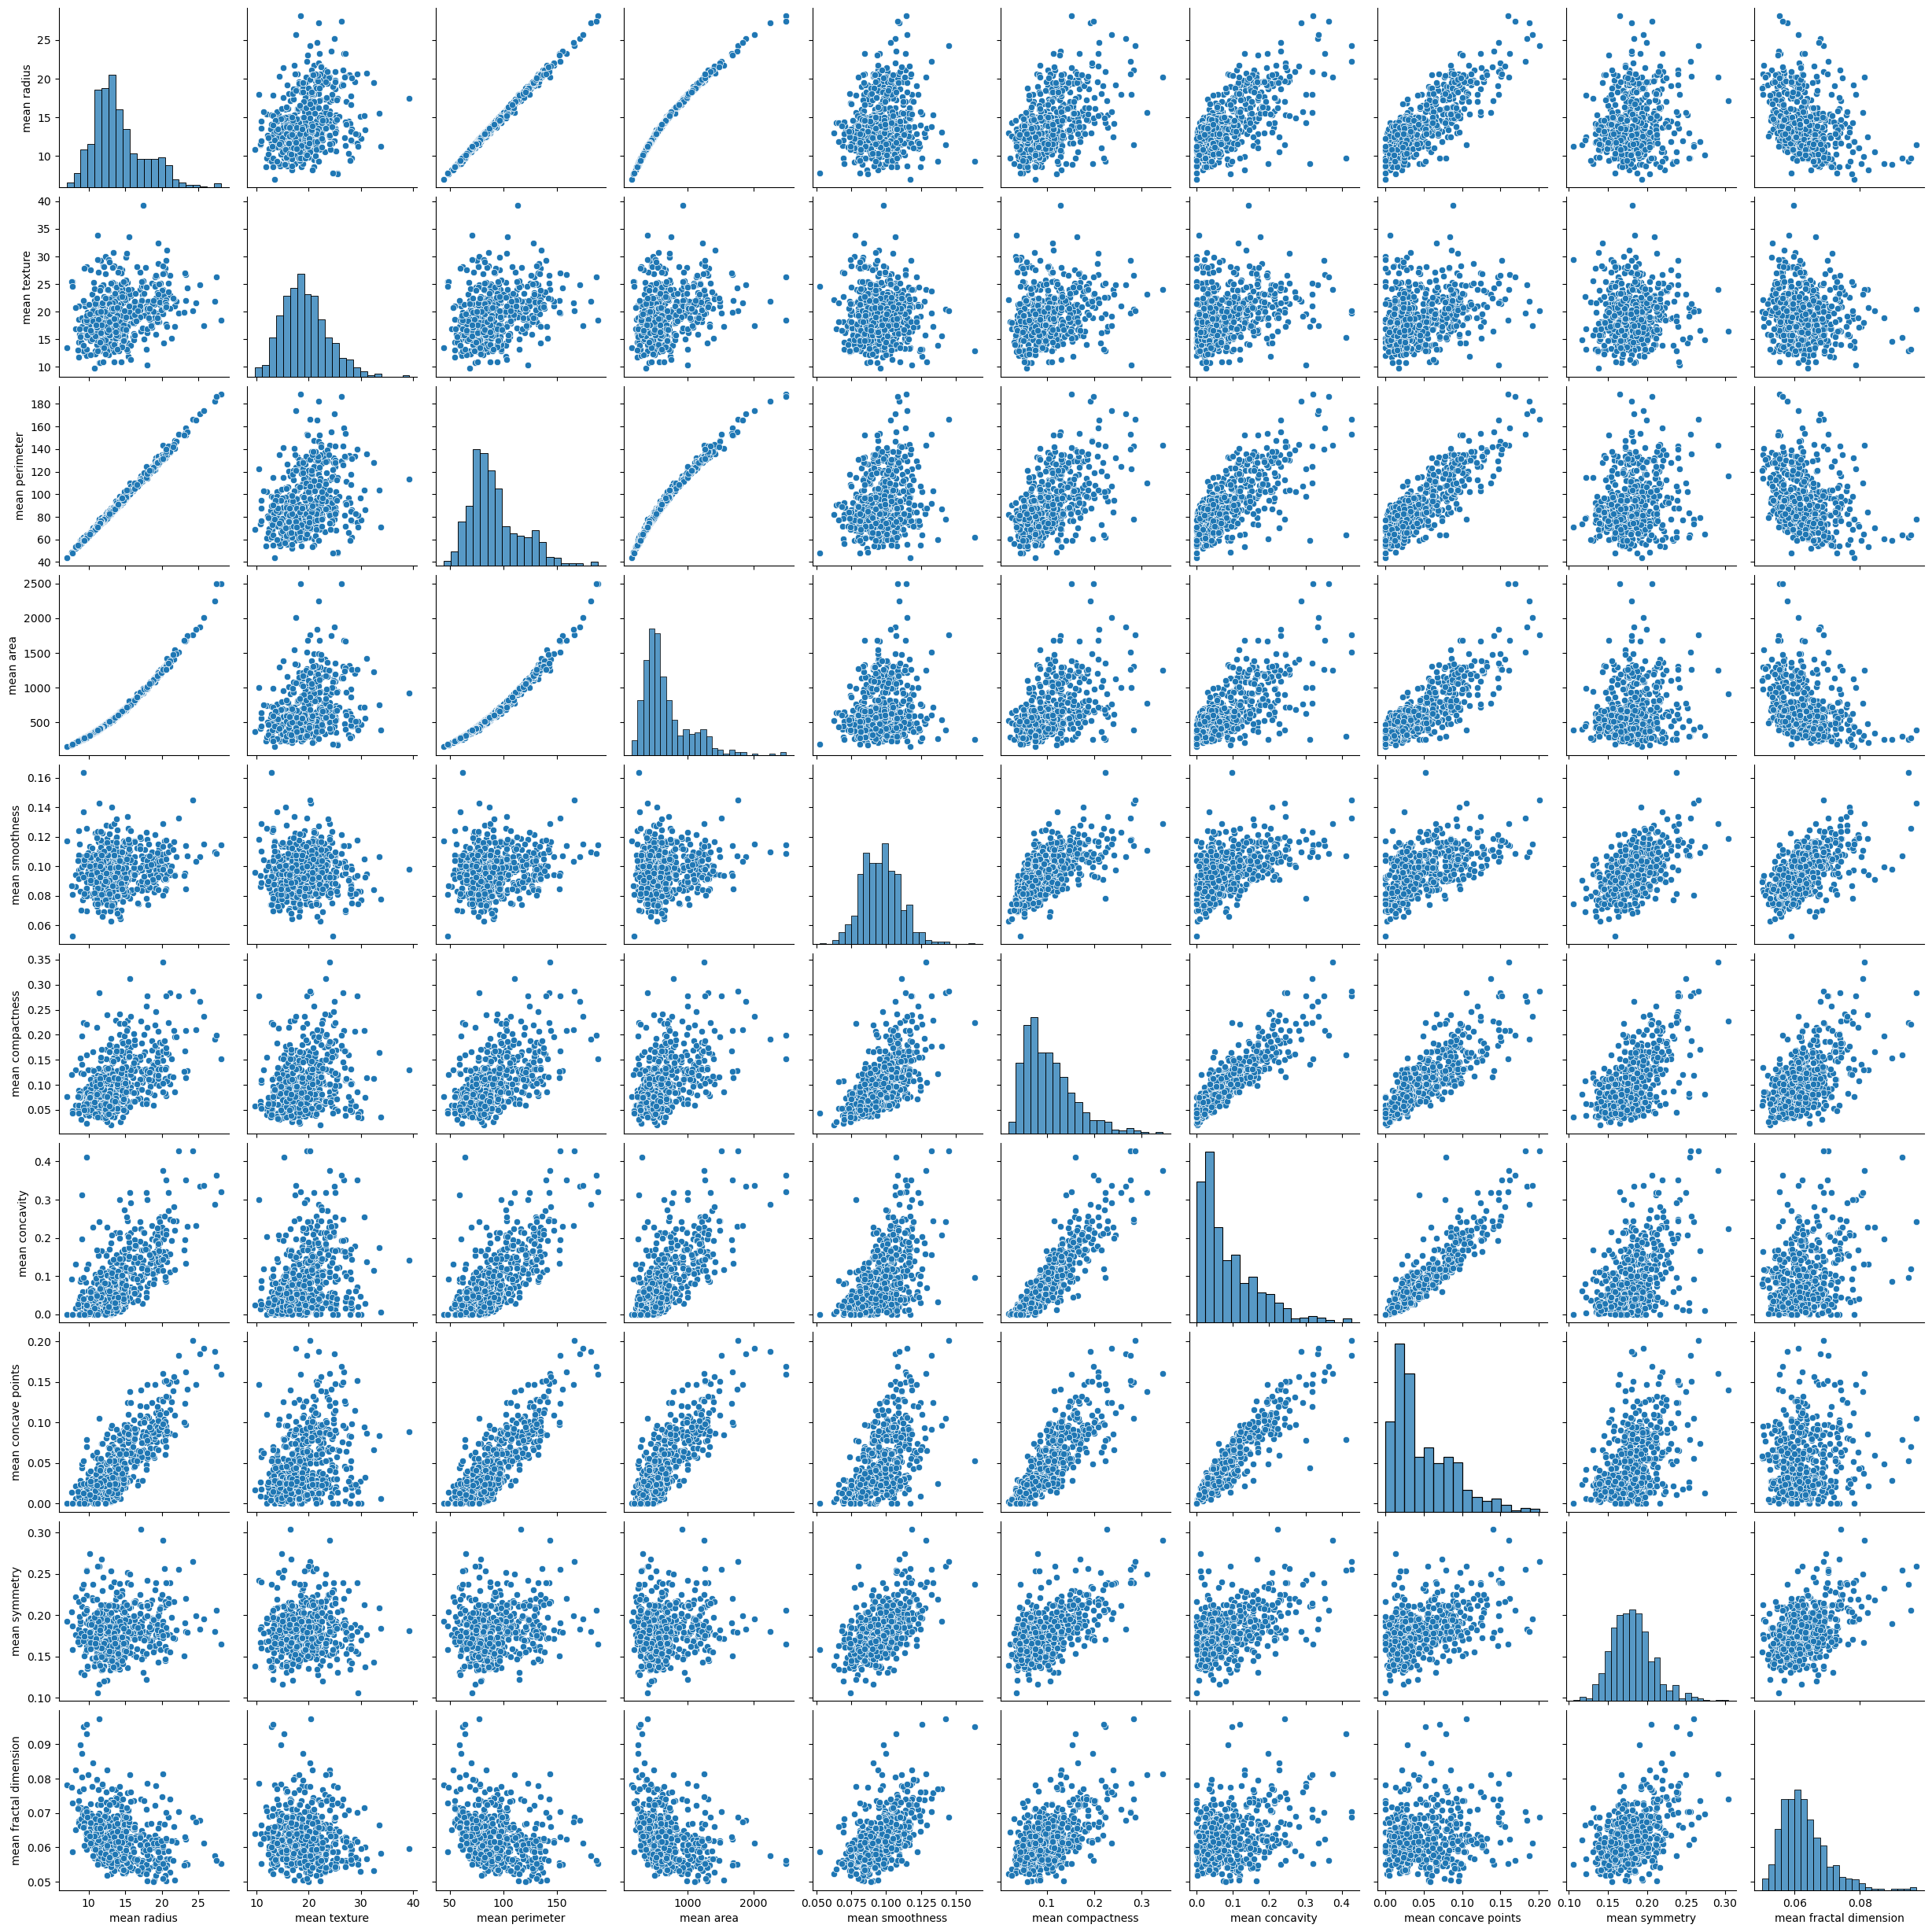

In [7]:
sns.pairplot(df.iloc[:,0:10])

 **d. Cleaning/Solving Imbalances of Data**

The data is splitted into a training and validation set, at a ratio of 70/30. In order to reduce of sampling error in each set, the distribution of two classes are computed for both training and validation sets. Note that the relative percentages of each classes in each sets: there exists a slight difference in how data sets are split -- `stratify` enables splitting datasets into train/test sets *in terms of classes*.



In [226]:
from sklearn.model_selection import train_test_split
from collections import Counter
X = cancer['data']
y = cancer['target']
print("Original Data (Pos/neg)")
print(cancer['target_names'][0], 0, np.count_nonzero(cancer['target'] == 0))
print(cancer['target_names'][1], 1, np.count_nonzero(cancer['target'] == 1), end="\n\n")

# Part II 1-a&b
print("Before stratifying:")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
print(Counter(y_train))
print(Counter(y_test))
print("Relative percentage of training set: malignant = {:.5f}, benign = {:.5f}, combined = {:.5f}".format(
    Counter(y_train)[0]/np.count_nonzero(cancer['target'] == 0), 
    Counter(y_train)[1]/np.count_nonzero(cancer['target'] == 1),
    ((Counter(y_train)[0]+Counter(y_train)[1]))/df.shape[0]))
print("Relative percentage of testing set: malignant = {:.5f}, benign = {:.5f}, combined = {:.5f}".format(
    Counter(y_test)[0]/np.count_nonzero(cancer['target'] == 0), 
    Counter(y_test)[1]/np.count_nonzero(cancer['target'] == 1),
    (Counter(y_test)[0]+Counter(y_test)[1])/df.shape[0]))

print()

print("After stratifying:")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

print("Relative percentage of training set: malignant = {:.5f}, benign = {:.5f}, combined = {:.5f}".format(
    Counter(y_train)[0]/np.count_nonzero(cancer['target'] == 0), 
    Counter(y_train)[1]/np.count_nonzero(cancer['target'] == 1),
    (Counter(y_train)[0]+Counter(y_train)[1])/df.shape[0]))
print("Relative percentage of testing set: malignant = {:.5f}, benign = {:.5f}, combined = {:.5f}".format(
    Counter(y_test)[0]/np.count_nonzero(cancer['target'] == 0), 
    Counter(y_test)[1]/np.count_nonzero(cancer['target'] == 1),
    (Counter(y_test)[0]+Counter(y_test)[1])/df.shape[0]))

Original Data (Pos/neg)
malignant 0 212
benign 1 357

Before stratifying:
Counter({1: 249, 0: 149})
Counter({1: 108, 0: 63})
Relative percentage of training set: malignant = 0.70283, benign = 0.69748, combined = 0.69947
Relative percentage of testing set: malignant = 0.29717, benign = 0.30252, combined = 0.30053

After stratifying:
Counter({1: 250, 0: 148})
Counter({1: 107, 0: 64})
Relative percentage of training set: malignant = 0.69811, benign = 0.70028, combined = 0.69947
Relative percentage of testing set: malignant = 0.30189, benign = 0.29972, combined = 0.30053


## Part II: K-Nearest Neighbors

In [227]:
from sklearn.neighbors import KNeighborsClassifier as knn
import warnings
warnings.filterwarnings('ignore')

**a-1. Exploring different k constants: setting k as 1**

Setting k=1 results in training score to be 1, meaning the model is fitted based on single-nearest neighbour of the training set. Therefore, since the model is not generalized but rather is highly specific to this training set **(i.e.overfitting)**, the score of 1 in the training set happens. 

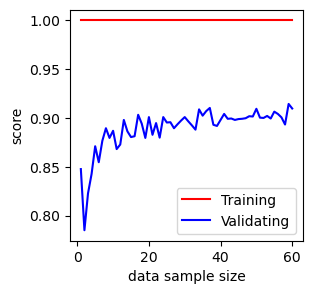

In [229]:
avg_train = []
avg_valid = []
valid_dict = {i:0 for i in range(1,66)}
train_dict = {i:0 for i in range(1,66)}

for j in range(20):
    x_lst = []
    y_lst = []
    for i in range(1,66):
        model = knn(1)
        # construct a training set and validation set.
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = i, test_size=.3)
        model.fit(X_train, y_train)
        x_lst.append(i) # List for plotting
        y_lst.append(model.score(X_test, y_test))
        
        # Record its training accuracy and validation accuracy (To compute average for each training sample size)
        valid_dict[i] += model.score(X_test, y_test)
        train_dict[i] += model.score(X_train, y_train)
    
for key in range(6,66):
    avg_valid.append(valid_dict[key]/20)
    avg_train.append(train_dict[key]/20)

x_average = np.linspace(1,60, num=60).reshape(-1,1)
y_avg_train = np.array(avg_train).reshape(-1,1)
y_avg_valid = np.array(avg_valid).reshape(-1,1)

plt.figure(figsize=(3,3)) 
plt.plot(x_average, y_avg_train, 'r')
plt.plot(x_average, y_avg_valid, 'b')
plt.xlabel('data sample size')
plt.ylabel('score')
plt.legend(['Training', 'Validating'])
plt.show()

**a-2. Exploring different k constants: deciding k hyperparameter**

ean validation accuracy fluctuates when k is less than 10 (mean accuracy's behavior is not uniform when k is under 3, and the 90th percentile of the mean accuracy smoothens after k=10, as seen in the graph). Therefore, validation accuracy can be explained by a linear model after k=10. For this reason, I would choose k=10 since such k number has the highest stable accuracy. 

y = [[-9.04239766e-05]]k + [0.92302661]


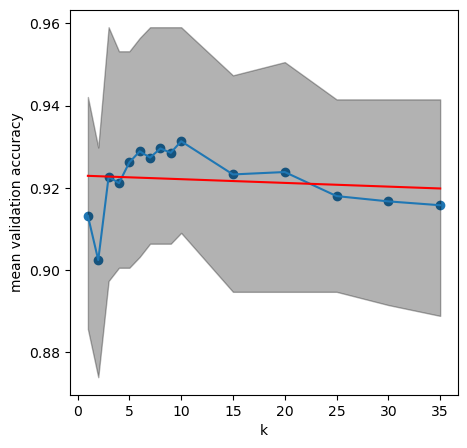

Average score at k=10: 0.9313450292397656


In [233]:
from sklearn.linear_model import LinearRegression
lst_k = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35]
result_dict = {}
for j in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,test_size = .3)
    result = []
    for i in lst_k:
        model1 = knn(i)
        model1.fit(X_train, y_train)
        result.append(model1.score(X_test, y_test))
    result_dict[j] = result

result_dict_rearranged = {i:[] for i in range(len(lst_k))}
for val in result_dict.values():
    for i in range(len(lst_k)):
        result_dict_rearranged[i].append(val[i])

avg_k = [sum(val)/50 for val in result_dict_rearranged.values()]

x2 = np.array(lst_k).reshape(-1,1)
y2 = np.array(avg_k).reshape(-1,1)
model2 = LinearRegression().fit(x2, y2)
y_pred = model2.predict(x2)
lin_eq = str(f"{model2.coef_}k + {model2.intercept_}")
print("y =", lin_eq)

plt.figure(figsize=(5,5)) 
plt.xlabel("k")
plt.ylabel("mean validation accuracy")
plt.scatter(lst_k, avg_k)
plt.plot(lst_k, avg_k)
plt.plot(x2, y_pred, color="red")

fifth = [np.percentile(v, 5) for v in result_dict_rearranged.values()]
nintyfifth = [np.percentile(v, 95) for v in result_dict_rearranged.values()]
plt.fill_between(lst_k, fifth, nintyfifth, color="k", alpha = .3)

plt.show()

print("Average score at k=10:", avg_k[9])

**b.Exploring dependence on amounts of data**

As seen in the blue graph, the larger dataset, the higher the knn model performs, but with a ceiling. Therefore, in order to increase the performance score, adding more data does not solve the problem. Whereas, the larger test size, the lower the model performs. Here, test_size=.3 is found to score the highest. 

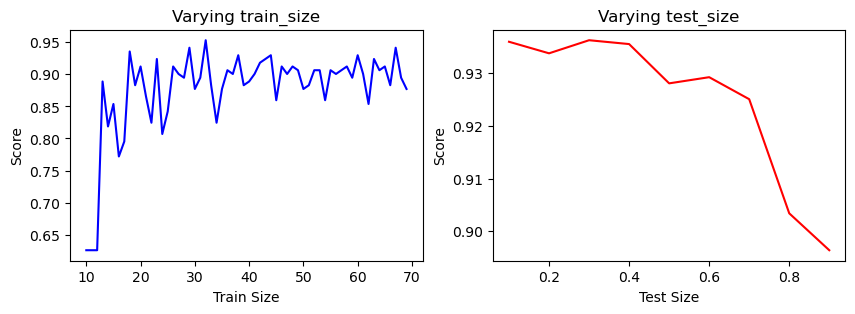

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.93596491 0.93377193 0.93625731 0.93552632 0.92807018 0.92923977
 0.92506266 0.90339912 0.89639376]


<Figure size 640x480 with 0 Axes>

In [23]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
x_lst = []
y_lst = []

# Fit a k-NN classifier with increasing amounts of data, from k to  60+k
for i in range(10,70):
    model = knn(10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size = i, test_size=.3)
    model.fit(X_train, y_train)
    x_lst.append(i)
    y_lst.append(model.score(X_test, y_test))

axes[0].plot( x_lst, y_lst, color="blue")
axes[0].set_xlabel('Train Size')
axes[0].set_ylabel('Score')
axes[0].set_title('Varying train_size')

# Fit a k-NN classifier with increasing test_size, ranges from 0.1 to 0.9
x_lst = np.linspace(0.1,0.9,9)
y_lst = [0]*9
for q in range(20):
    y_temp = []
    for j in np.linspace(0.1,.9,9):
        model = knn(10)
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=j)
        model.fit(X_train, y_train)
        y_temp.append(model.score(X_test, y_test)/20)
    y_lst = np.add(y_lst, y_temp)

plt.plot(x_lst, y_lst, color="r")
axes[1].set_xlabel('Test Size')
axes[1].set_ylabel('Score')
axes[1].set_title('Varying test_size')
plt.show()

#To see which test_size is score-optimal
plt.tight_layout()
print(x_lst)
print(y_lst)

**d. Adjust values using feature selection to increase performances**

In [13]:
from sklearn.feature_selection import SequentialFeatureSelector

In [14]:
knn_model = knn(10).fit(X_train,y_train)
print(model.score(X_test, y_test))

0.9005847953216374


In [15]:
print(cancer.feature_names)
print(cancer.feature_names.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(30,)


**Using `SequentialFeatureSelector` from `sklearn`, features are chosen based on foward and backward selectors.**

In [16]:
sfs_forward = SequentialFeatureSelector(
    knn_model, direction="forward"
).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    knn_model, direction="backward"
).fit(X, y)

In [24]:
feature_names = cancer.feature_names

In [25]:
print("Forward Selection")
print(feature_names[sfs_forward.get_support()], "\n\tNumber of features:", feature_names[sfs_forward.get_support()].shape[0],"\n")
print("Backward Selection")
print(print(feature_names[sfs_backward.get_support()], "\n\tNumber of features:", feature_names[sfs_backward.get_support()].shape[0],"\n"))

Forward Selection
['mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean fractal dimension' 'radius error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst smoothness' 'worst concave points' 'worst fractal dimension'] 
	Number of features: 15 

Backward Selection
['mean area' 'concavity error' 'concave points error' 'symmetry error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry'
 'worst fractal dimension'] 
	Number of features: 15 

None


In [28]:
X_for = np.array(df.loc[:,feature_names[sfs_forward.get_support()]])
X_train, X_test, y_train, y_test = train_test_split(X_for,y,test_size = .3)

knn_for = knn(10).fit(X_train, y_train)
knn_for.score(X_test,y_test)

0.935672514619883

In [29]:
X_back = np.array(df.loc[:,feature_names[sfs_backward.get_support()]])
X_train, X_test, y_train, y_test = train_test_split(X_back,y,test_size = .3)

knn_back = knn(10).fit(X_train, y_train)
knn_back.score(X_test,y_test)

0.9532163742690059

This has been done in order to prevent overfitting of datasets onto the model. Using knn model, it has been proven that backward selector results in a better score than forward selector does. Moreover, there is not much of a difference in the scores of the original and the backward datasets, even though the length of the original dataset is twice as big as the backward dataset. This clearly shows that overfitting happens in the original one. 

**However, features are selected based on knn model, it cannot be generalized that those selected features would prevent overfitting/improve performances for other models**

In [30]:
X = cancer['data']
y = cancer['target']

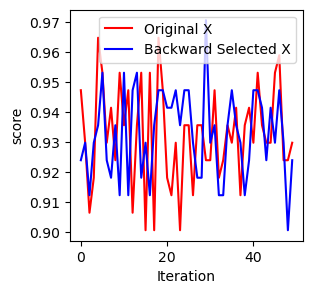

Mean of the original X's score: 0.9326315789473683
Mean of the backward selection X's score: 0.9327485380116957


In [33]:
score = []
score_back = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3)
    knn_model = knn(10).fit(X_train, y_train)
    score.append(knn_model.score(X_test, y_test))

    X_train, X_test, y_train, y_test = train_test_split(X_back,y,test_size = .3)
    knn_model_back = knn(10).fit(X_train, y_train)
    score_back.append(knn_model_back.score(X_test, y_test))

plt.figure(figsize=(3,3)) 
plt.plot(score, 'r')
plt.plot(score_back, 'b')
plt.xlabel('Iteration')
plt.ylabel('score')
plt.legend(['Original X', 'Backward Selected X'])
plt.show()

print("Mean of the original X's score:", np.sum(score)/len(score))
print("Mean of the backward selection X's score:", np.sum(score_back)/len(score_back))

## Part III: Linear Regression Model

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Linear Regression model assumes that classes can be seperated based on a linear model. The basic form of linear regression model, y = b0+µ\*b1, is influenced by variables b0 and b1. Note that they are heavily influenced on the *weights* of a data. This section experiments with such property, discussing how `normalize` changes the performance score of a linear regression model. 

In [80]:
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size = .3)
knn_model = knn(3)
knn_model.fit(X_train, y_train)

p_model = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
p_model.fit(X_train, y_train)

Perceptron(alpha=1e-06, penalty='l2', tol=1e-10)

`Confusion Matrix`, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. 

In [85]:
from sklearn import metrics 

print("For knn: ")
print("Training score:", knn_model.score(X_train, y_train))
print("Testing score:", knn_model.score(X_test, y_test))
ypred1 = knn_model.predict(X_train)
print("confusion matrix")
print(metrics.confusion_matrix(y_train, ypred1))

print()

print("For perceptron: ")
print("Training score:", p_model.score(X_train, y_train))
print("Testing score:", p_model.score(X_test, y_test))
ypred2 = p_model.predict(X_train)
print("confusion matrix")
print(metrics.confusion_matrix(y_train, ypred2))

For knn: 
Training score: 0.9623115577889447
Testing score: 0.9181286549707602
confusion matrix
[[138  10]
 [  5 245]]

For perceptron: 
Training score: 0.7587939698492462
Testing score: 0.695906432748538
confusion matrix
[[ 52  96]
 [  0 250]]


Knn model seems to perform better, as the average score for knn is higher with small variance. Also, the interquartile range for perceptron is wider than that of knn, so in terms of precision, knn is also better. 

Text(0, 0.5, 'score')

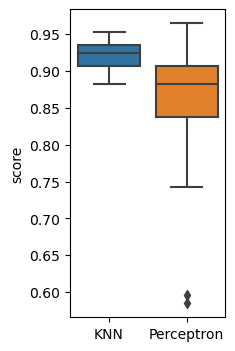

In [87]:

knn_score = []
p_score = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)
    knn_model = knn(3)
    knn_model.fit(X_train, y_train)

    p_model = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
    p_model.fit(X_train, y_train)
    
    knn_score.append(knn_model.score(X_test, y_test))
    p_score.append(p_model.score(X_test, y_test))

df_dict = {'KNN':knn_score, 'Perceptron':p_score}
df = pd.DataFrame(df_dict)

plt.figure(figsize=(2,4))
sns.boxplot(data=df)
plt.ylabel('score')

In [74]:
from sklearn.preprocessing import normalize 

After normalization, the average score for knn remains the same, but that for perceptron increases alot. This may be because perceptron is heavily reliant on "weight". The data's features have different scales of measurements.This means that there are large input values, which can increase the weight of perceptron model, leading to higher generalization error. By normalizing the data, the weight is not overestimated, leading to the increase in perceptron score. 

Text(0, 0.5, 'score')

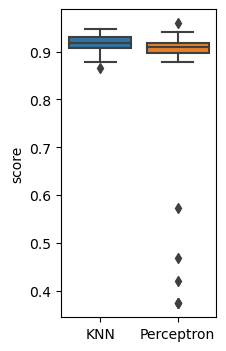

In [88]:
X_norm = normalize(X)

knn_score = []
p_score = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=.3)
    knn_model = knn(3)
    knn_model.fit(X_train, y_train)

    p_model = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
    p_model.fit(X_train, y_train)
    
    knn_score.append(knn_model.score(X_test, y_test))
    p_score.append(p_model.score(X_test, y_test))

df_dict = {'KNN':knn_score, 'Perceptron':p_score}
df = pd.DataFrame(df_dict)

plt.figure(figsize=(2,4))
sns.boxplot(data=df)
plt.ylabel('score')

This section additionally experiments with the magnitude of data contamination on a model's performances by adding Gaussian noise to the features. I evaluated how the accuracy deteriorates for both algorihms as you increase the amount of contamination.

Gaussian noise with mean 0 and interquartile range of 4 different magnitudes is added -- 1, 10, 100, and 1000x. Accuracy of both knn and perceptron models decrease as the noise strength increases. Also, the interquartile range for the perceptron model increases more rapidly compared with knn. Interestingy, when the strength is set to be 1000, the interquartile ranges for both models increase, but the mean score also increases instead of decreasing. 

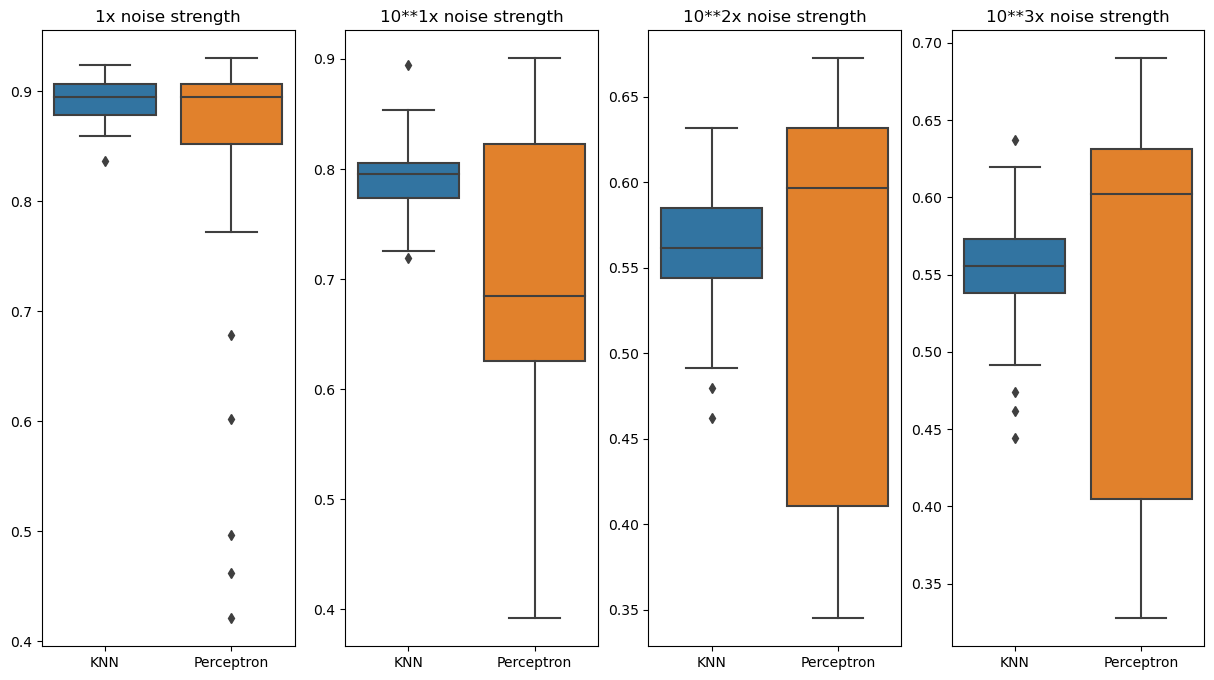

In [89]:
fig, axes = plt.subplots(1,4, figsize = (15,8))

knn_score = []
p_score = []
for i in range(50):

    noise_strength = 1
    noise_col = np.transpose([noise_strength*np.random.rand(len(X_norm))])
    X_noise = np.concatenate((X_norm, noise_col), axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_noise, y, test_size=.3)
    knn_model = knn(3)
    knn_model.fit(X_train, y_train)

    p_model = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
    p_model.fit(X_train, y_train)

    knn_score.append(knn_model.score(X_test, y_test))
    p_score.append(p_model.score(X_test, y_test))

df_dict = {'KNN':knn_score, 'Perceptron':p_score}
df = pd.DataFrame(df_dict)
sns.boxplot(ax=axes[0], data=df)
axes[0].set_title("1x noise strength")

for j in range(1,4): 
    knn_score = []
    p_score = []
    for i in range(50):

        noise_strength = 10**j
        noise_col = np.transpose([noise_strength*np.random.rand(len(X_norm))])
        X_noise = np.concatenate((X_norm, noise_col), axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X_noise, y, test_size=.3)
        knn_model = knn(3)
        knn_model.fit(X_train, y_train)

        p_model = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
        p_model.fit(X_train, y_train)

        knn_score.append(knn_model.score(X_test, y_test))
        p_score.append(p_model.score(X_test, y_test))

    df_dict = {'KNN':knn_score, 'Perceptron':p_score}
    df = pd.DataFrame(df_dict)
    sns.boxplot(ax=axes[j], data=df)
    axes[j].set_title("10**{}x noise strength".format(j))


**This section compares different linear regression model in terms of their score and predict vs. actual plots.**

In [216]:
lin_score = []
lin_pred = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=.3)
    lin_model = LinearRegression().fit(X_train,y_train)
    lin_score.append(lin_model.score(X_test, y_test))
    ypred = lin_model.predict(X_test)
    lin_pred.append([ypred, y_test])

rcv_score = []
rcv_pred = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=.3)
    rcv_model = RidgeCV().fit(X_train,y_train)
    rcv_score.append(rcv_model.score(X_test, y_test))
    ypred = rcv_model.predict(X_test)
    rcv_pred.append([ypred, y_test])
    
perc_score = []
perc_pred = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=.3)
    perc_model = Perceptron().fit(X_train,y_train)
    perc_score.append(perc_model.score(X_test, y_test))
    ypred = perc_model.predict(X_test)
    perc_pred.append([ypred, y_test])

logreg_score = []
logreg_pred = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=.3)
    LogReg_model = LogisticRegression().fit(X_train,y_train)
    logreg_score.append(LogReg_model.score(X_test, y_test))
    ypred = LogReg_model.predict(X_test)
    logreg_pred.append([ypred, y_test])
    

svc_lin_score = []
svc_lin_pred = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=.3)
    svc_lin_model = SVC(kernel='linear').fit(X_train,y_train)
    svc_lin_score.append(svc_lin_model.score(X_test, y_test))
    ypred = svc_lin_model.predict(X_test)
    svc_lin_pred.append([ypred, y_test])

svc_poly_score = []
svc_poly_pred = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=.3)
    svc_poly_model = SVC(kernel='poly').fit(X_train,y_train)
    svc_poly_score.append(svc_poly_model.score(X_test, y_test))
    ypred = svc_poly_model.predict(X_test)
    svc_poly_pred.append([ypred, y_test])

Text(0.5, 0.98, 'Mean Score for Different Linear Regression Models')

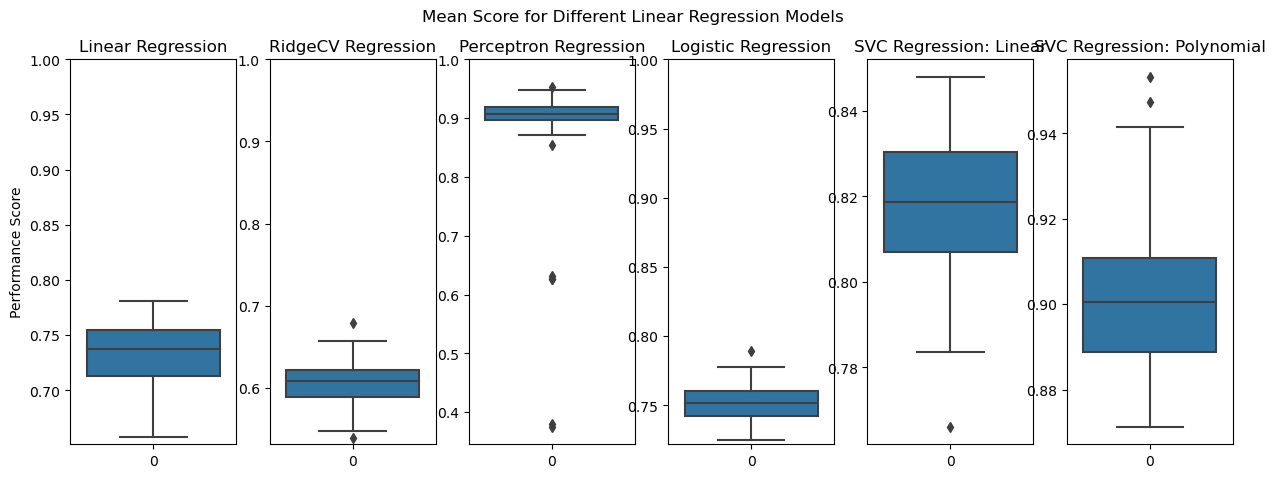

In [217]:
fig,axes = plt.subplots(1,6,figsize=(15,5))

sns.boxplot(ax=axes[0], data=lin_score)
sns.boxplot(ax=axes[1], data=rcv_score)
sns.boxplot(ax=axes[2], data=perc_score)
sns.boxplot(ax=axes[3], data=logreg_score)
sns.boxplot(ax=axes[4], data=svc_lin_score)
sns.boxplot(ax=axes[5], data=svc_poly_score)

axes[0].set_title("Linear Regression")
axes[1].set_title("RidgeCV Regression")
axes[2].set_title("Perceptron Regression")
axes[3].set_title("Logistic Regression")
axes[4].set_title("SVC Regression: Linear")
axes[5].set_title("SVC Regression: Polynomial")

for i in range(4):
    axes[i].set_ylim([None, 1])

axes[0].set_ylabel("Performance Score")
fig.suptitle("Mean Score for Different Linear Regression Models")

Mean score for the perceptron model is found to be the highest. In-depth analysis on the perceptron is done using `metrics`. Note that while the score for successfully classifying data as benign is high, that for classifying as malignant is relatively low. Next section explores various *non-linear regressio models* to see if they can do better than the perceptron model.

Average score: 0.8719298245614034
metrics accuracy 0.9181286549707602
confusion matrix
[[ 55   9]
 [  3 104]] 

Classification report for classifier Perceptron():
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        64
           1       0.92      0.97      0.95       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171




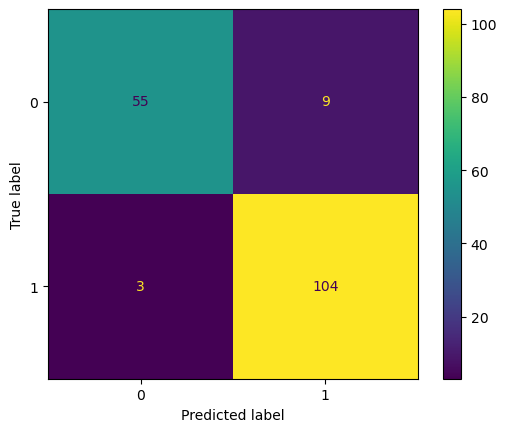

In [218]:
predict_test = perc_model.predict(X_test)
print("Average score:", np.sum(perc_score)/len(perc_score))
print("metrics accuracy", metrics.accuracy_score(y_test, ypred))
print("confusion matrix")
print(metrics.confusion_matrix(y_test,predict_test), "\n")

print(
    f"Classification report for classifier {perc_model}:\n"
    f"{metrics.classification_report(y_test, predict_test)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict_test)

## Part IV: Non-linear Regression Model

**SVC - rbf and sigmoid**

`SVC` can be a non-linear model by changing its kernal type.

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)
svc_rbf_model = SVC(kernel='rbf').fit(X_train,y_train)
ypred = svc_rbf_model.predict(X_test)
print("metrics accuracy", metrics.accuracy_score(y_test, ypred))
print("confusion matrix")
print(metrics.confusion_matrix(y_test, ypred))
score = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)
    svc_rbf_model = SVC(kernel='rbf').fit(X_train,y_train)
    score.append(svc_rbf_model.score(X_test, y_test))

print("Average Score:", np.sum(score)/50)

metrics accuracy 0.9122807017543859
confusion matrix
[[ 49  15]
 [  0 107]]
Average Score: 0.911812865497076


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)
svc_sigmoid_model = SVC(kernel='sigmoid').fit(X_train,y_train)
ypred = svc_sigmoid_model.predict(X_test)
print("metrics accuracy", metrics.accuracy_score(y_test, ypred))
print("confusion matrix")
print(metrics.confusion_matrix(y_test, ypred))
score = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)
    svc_sigmoid_model = SVC(kernel='sigmoid').fit(X_train,y_train)
    score.append(svc_sigmoid_model.score(X_test, y_test))

print("Average Score:", np.sum(score)/50)

metrics accuracy 0.38011695906432746
confusion matrix
[[ 5 59]
 [47 60]]
Average Score: 0.4513450292397661


**Tree Classifier**

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [170]:
X=cancer['data']
y=cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)

In [171]:
decision_model = DecisionTreeClassifier().fit(X_train, y_train)
ypred = decision_model.predict(X_test)
print("metrics accuracy", metrics.accuracy_score(y_test, ypred))
print("confusion matrix")
print(metrics.confusion_matrix(y_test, ypred))

metrics accuracy 0.9298245614035088
confusion matrix
[[60  4]
 [ 8 99]]


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


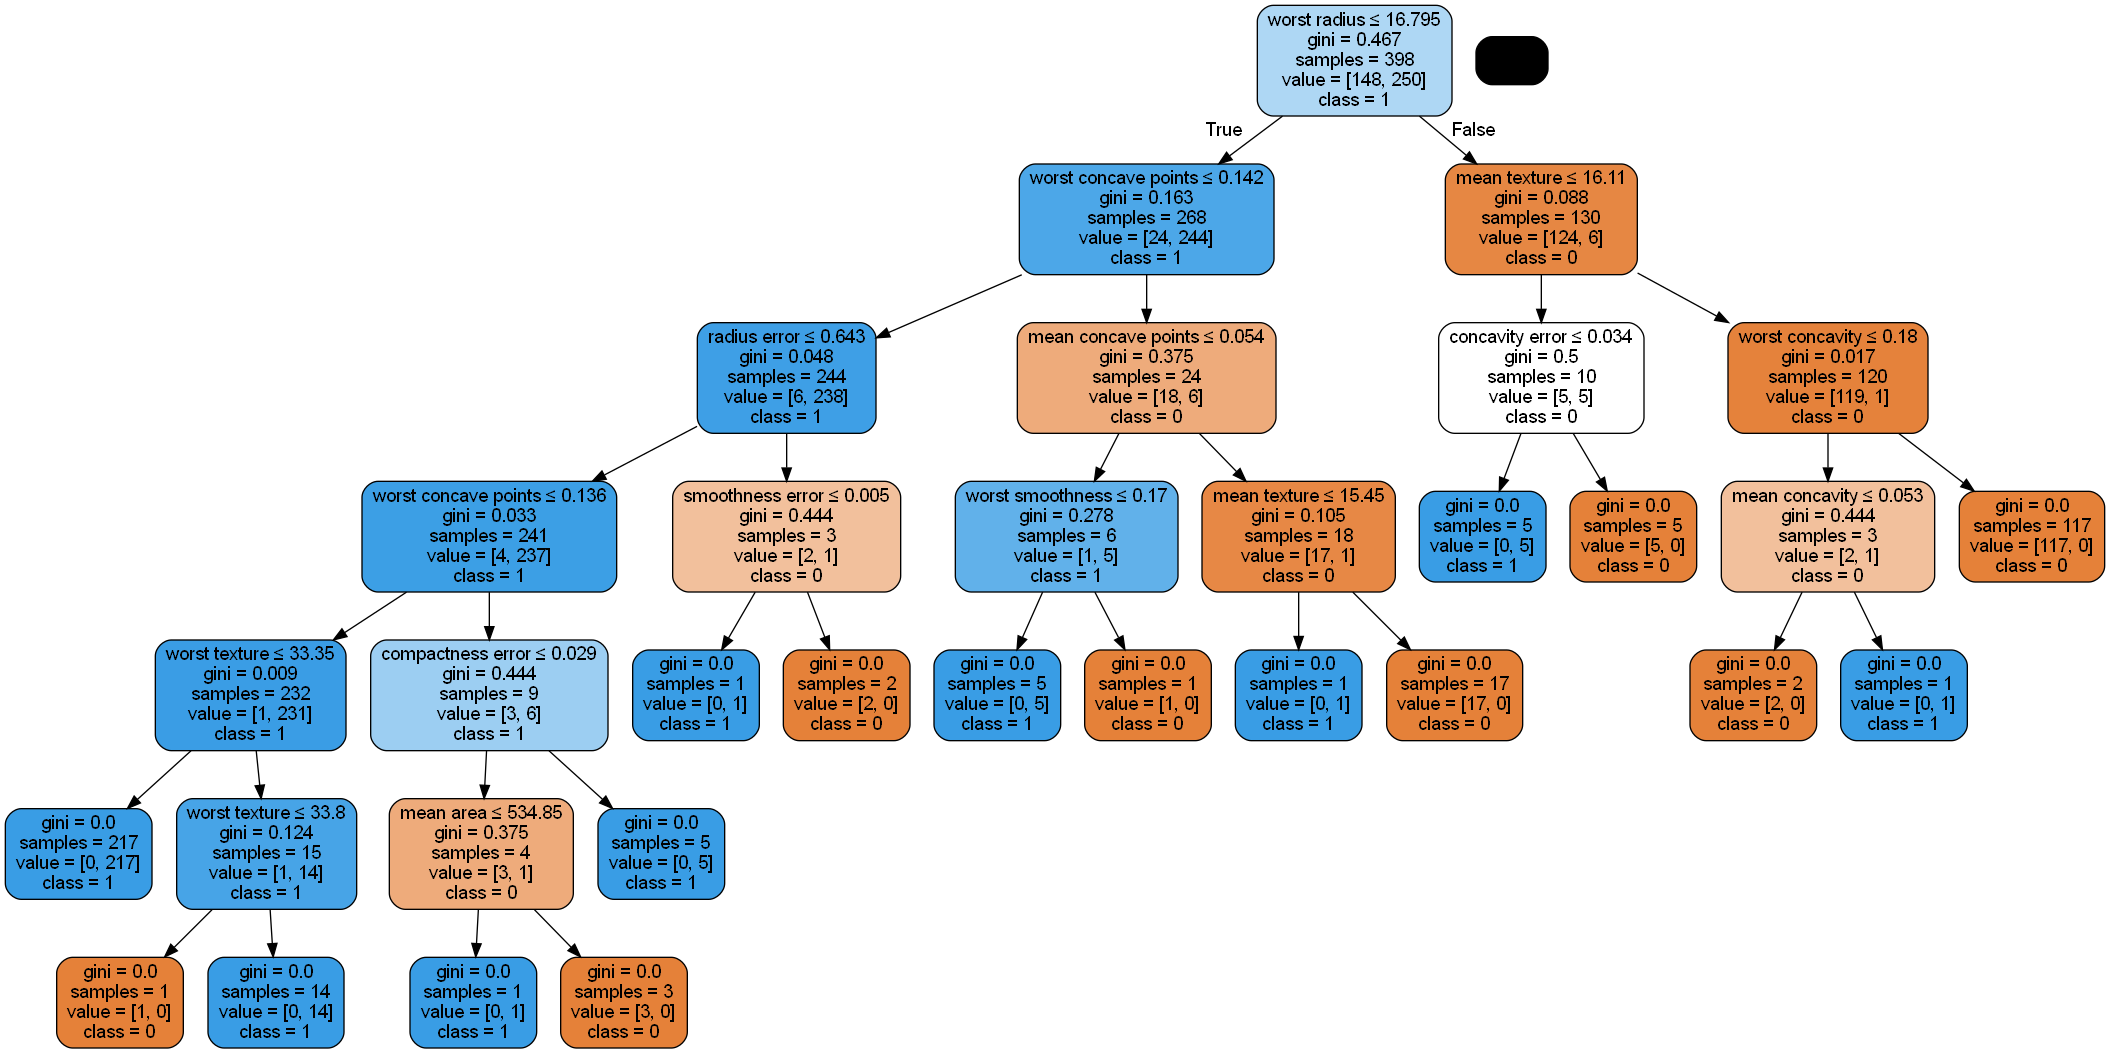

In [172]:
import os
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(decision_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cancer.feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('liver-disease.png')
print(feature_names)

Image(graph.create_png())

Decision tree classifier includes max_depth as its hyperparameter. This section examines which value of max_depth will lead to the highest performance score. The result shows that max_depth=4 results seems the best value in terms of performance score and elapsed time.

In [173]:
import time 
print("Depth\tPerformance Score\tElapsed Time")
print("-----\t-----------------\t------------")
for i in range(1,10):
    start_time = time.time()
    clf = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
    end = time.time()
    print("{}\t{}\t{}".format(i, clf.score(X_test, y_test),end-start_time))

Depth	Performance Score	Elapsed Time
-----	-----------------	------------
1	0.9181286549707602	0.004393339157104492
2	0.9239766081871345	0.0043790340423583984
3	0.9298245614035088	0.0032150745391845703
4	0.9415204678362573	0.002020597457885742
5	0.9239766081871345	0.00737452507019043
6	0.9239766081871345	0.008230447769165039
7	0.9415204678362573	0.011449813842773438
8	0.9298245614035088	0.008109807968139648
9	0.9239766081871345	0.010730743408203125


In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)
decision_model = DecisionTreeClassifier(max_depth=4).fit(X_train,y_train)
ypred = decision_model.predict(X_test)
print("metrics accuracy", metrics.accuracy_score(y_test, ypred))
print("confusion matrix")
print(metrics.confusion_matrix(y_test, ypred))
score = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)
    decision_model = DecisionTreeClassifier(max_depth=4).fit(X_train,y_train)
    score.append(decision_model.score(X_test, y_test))

print("Average Score:", np.sum(score)/50)

metrics accuracy 0.9239766081871345
confusion matrix
[[59  5]
 [ 8 99]]
Average Score: 0.9292397660818713


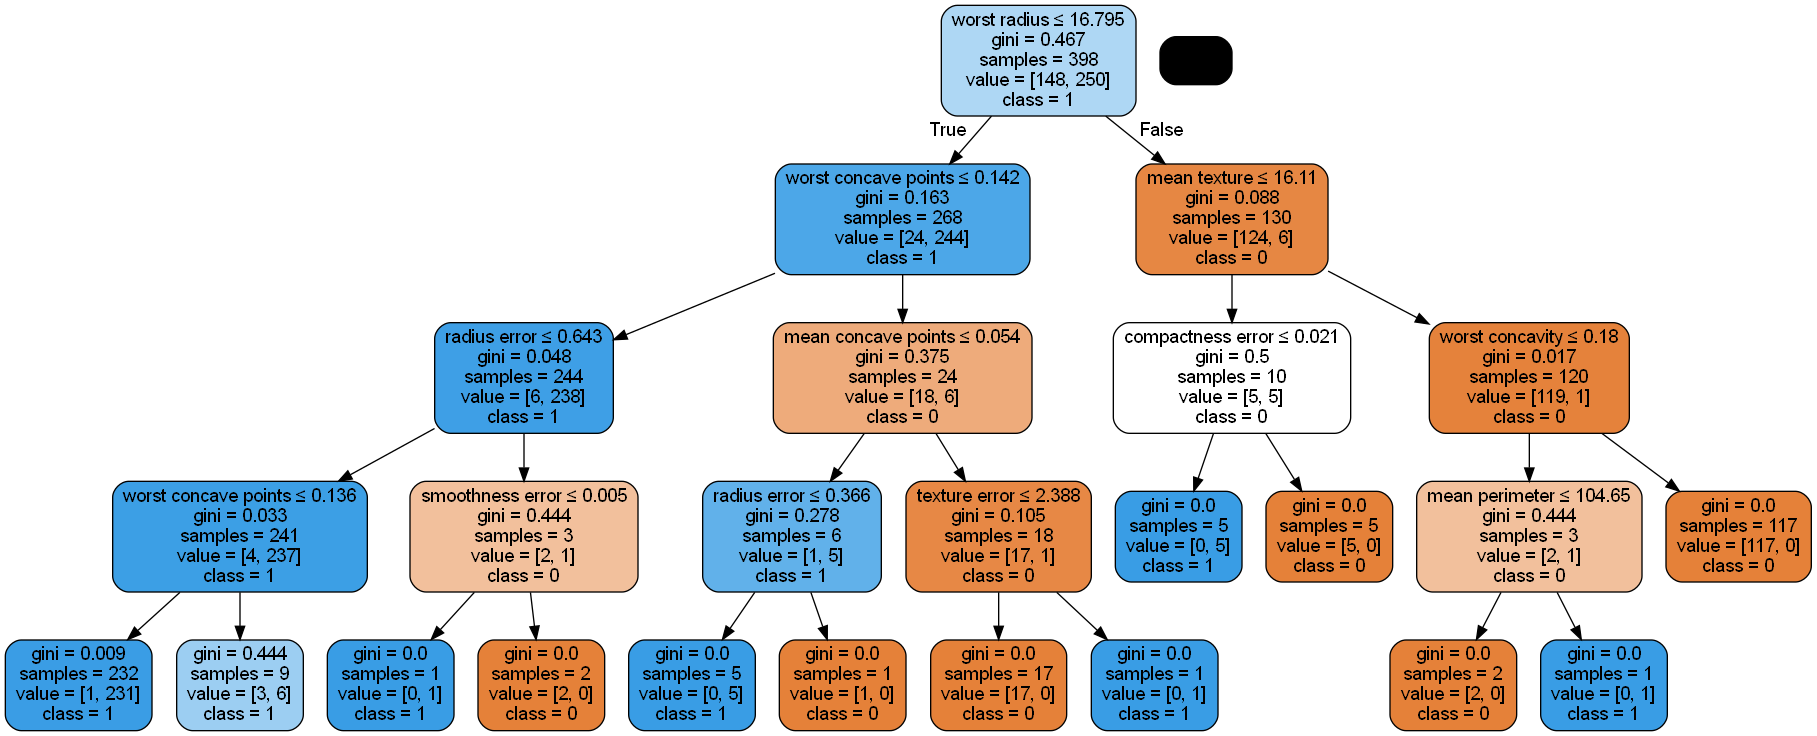

In [175]:
import os
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(decision_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cancer.feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('liver-disease.png')

Image(graph.create_png())

Testing `RandomForestClassifier`: It seems that performance score and elapsed time are not correlated with the number of depth. (The result shows that they are independent with each other). Setting max_depth = None, the score of random forest is found to be higher than than of decision tree.

In [180]:
import time 
print("Depth\tPerformance Score\tElapsed Time")
print("-----\t-----------------\t------------")
for i in range(1,20):
    start_time = time.time()
    clf = RandomForestClassifier(max_depth = i).fit(X_train, y_train)
    end = time.time()
    print("{}\t{}\t{}".format(i, clf.score(X_test, y_test),end-start_time))

Depth	Performance Score	Elapsed Time
-----	-----------------	------------
1	0.9298245614035088	0.1889972686767578
2	0.9298245614035088	0.21786785125732422
3	0.9473684210526315	0.208831787109375
4	0.9532163742690059	0.20637845993041992
5	0.9532163742690059	0.2593259811401367
6	0.9473684210526315	0.2655951976776123
7	0.9532163742690059	0.2674868106842041
8	0.9532163742690059	0.24356985092163086
9	0.9532163742690059	0.2597970962524414
10	0.9532163742690059	0.25959229469299316
11	0.9532163742690059	0.24180126190185547
12	0.9532163742690059	0.2510993480682373
13	0.9590643274853801	0.25324058532714844
14	0.9590643274853801	0.24928712844848633
15	0.9473684210526315	0.2686185836791992
16	0.9532163742690059	0.30756044387817383
17	0.9532163742690059	0.25989770889282227
18	0.9532163742690059	0.27227163314819336
19	0.9473684210526315	0.25951361656188965


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)
rclf = RandomForestClassifier().fit(X_train,y_train)
ypred = rclf.predict(X_test)
print("metrics accuracy", metrics.accuracy_score(y_test, ypred))
print("confusion matrix")
print(metrics.confusion_matrix(y_test, ypred))
score = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)
    rclf = RandomForestClassifier().fit(X_train,y_train)
    score.append(rclf.score(X_test, y_test))

print("Average Score:", np.sum(score)/50)

metrics accuracy 0.9649122807017544
confusion matrix
[[ 58   6]
 [  0 107]]
Average Score: 0.9581286549707602


This is the visualization of the first tree used in the random forest model. 

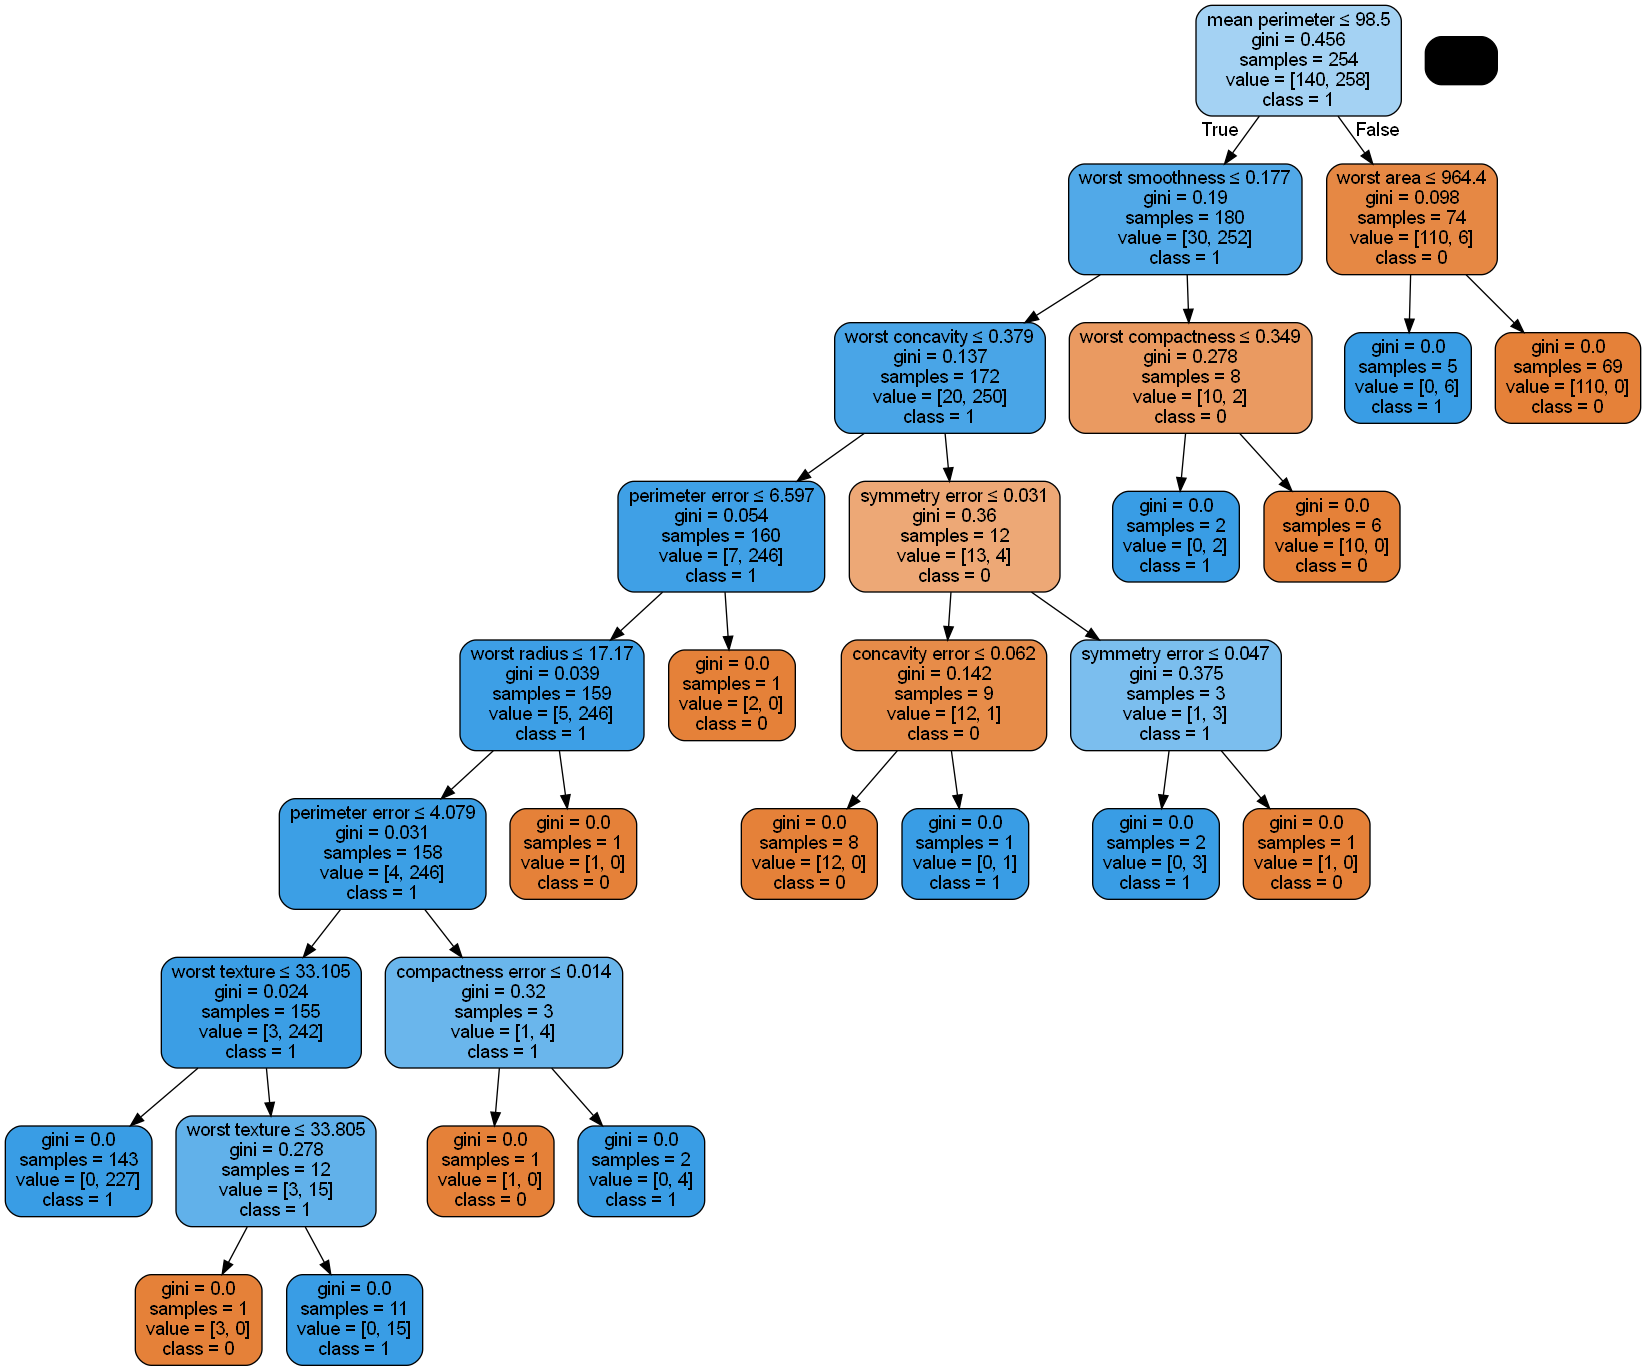

In [183]:
import os
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(rclf.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cancer.feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('liver-disease.png')

Image(graph.create_png())

**Neural Network: ANN**

MLPClassifier has lots of hyperparameters to choose from. For the simplicity, here, the number of hidden layer is set to be 1, since in general, one hidden layer is sufficient for the large majority of problems.

**hidden_layer_sizes:** The most commonly relied on is 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'. Reference: "Introduction to Neural Networks in Java" by Jeff Heaton. Therefore, the number of nodes is chosen to be the mean of input + output nodes.

**activation:** There are several options to choose: {identity’, ‘logistic’, ‘tanh’, ‘relu’}.

**solver:** {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

**alpha:** parameter to prevent overfitting. The higher the value is, more restriction is done to prevent overfitting. 

In [456]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=((df.shape[1]+2)//2), activation='relu', max_iter=200, alpha=.03).fit(X_train, y_train)
print("score for training:", mlp_model.score(X_train, y_train))
print("score for testing:", mlp_model.score(X_test, y_test))

predict_test = mlp_model.predict(X_test)

print("metrics accuracy", metrics.accuracy_score(y_test, predict_test))
print("confusion matrix")
print(metrics.confusion_matrix(y_test, predict_test))

score for training: 0.8819095477386935
score for testing: 0.9298245614035088
metrics accuracy 0.9298245614035088
confusion matrix
[[ 56   7]
 [  5 103]]


## Part V: Build Neural Network with PyTorch
Simple, fully connected neural network with one hidden layer. Input layer has 30 nodes, hidden layer has 100 and output layer 2 neurons.

In [457]:
import torch
from torch import nn
import torch.nn.functional as F

In [458]:
X = cancer.data.astype('float32')
y = cancer.target.astype('int64')

In [459]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [460]:
data_dim = X.shape[1]
hidden_dim = 1000
output_dim = len(np.unique(cancer.target))
data_dim, hidden_dim, output_dim

(30, 1000, 2)

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.dtype)

float32


A Neural network in PyTorch's framework.

In [481]:
class ClassifierModule(nn.Module):
    def __init__(
            self,
            input_dim=data_dim,
            hidden_dim=hidden_dim,
            output_dim=output_dim,
            dropout=.5, #Threshold to reduce noise
    ):
        super(ClassifierModule, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X)) #Use relu as its hidden layer's activation function
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)#Use softmax as its output layer's activation function
        return X

In [477]:
print(ClassifierModule())

ClassifierModule(
  (dropout): Dropout(p=1, inplace=False)
  (hidden): Linear(in_features=30, out_features=1000, bias=True)
  (output): Linear(in_features=1000, out_features=2, bias=True)
)


In [478]:
from skorch import NeuralNetClassifier

In [479]:
torch.manual_seed(0)

net = NeuralNetClassifier(
    ClassifierModule,
    max_epochs=20, #iteration number
    lr=0.1, #learning rate 
    device=device,
)

In [480]:
net.fit(X_train,y_train)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6952       0.6250        5.9784  0.0445
      2        0.6861       0.6250        5.9784  0.0527
      3        0.6795       0.6250        5.9784  0.0500
      4        0.6746       0.6250        5.9784  0.0500
      5        0.6711       0.6250        5.9784  0.0420
      6        0.6684       0.6250        5.9784  0.0500
      7        0.6665       0.6250        5.9784  0.0499
      8        0.6651       0.6250        5.9784  0.0500
      9        0.6641       0.6250        5.9784  0.0505
     10        0.6633       0.6250        5.9784  0.0571
     11        0.6628       0.6250        5.9784  0.0488
     12        0.6624       0.6250        5.9784  0.0479
     13        0.6621       0.6250        5.9784  0.0555
     14        0.6618       0.6250        5.9784  0.0452
     15        0.6617       0.6250        5.9784  0.0467
     16        0.6616       0.6

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ClassifierModule(
    (dropout): Dropout(p=1, inplace=False)
    (hidden): Linear(in_features=30, out_features=1000, bias=True)
    (output): Linear(in_features=1000, out_features=2, bias=True)
  ),
)

In [415]:
y_pred = net.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.631578947368421